# Using Monte Carlo simulation to model NEAR future price paths

In [8]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# Upload data and convert the date column from object(string) to datetime
data = pd.read_csv('near_data.csv',parse_dates=['DATE'])

# Create DataFrame
df = pd.DataFrame(data)

# Set the 'DATE' column as the index
df.set_index('DATE', inplace=True)

# Adjust the total_volume to remove scientific notation
df['TOTAL_VOLUME'] = df['TOTAL_VOLUME'].apply(lambda x: '{:.2f}'.format(x))


# Display the first few rows
print(df.head())


                            PRICE TOTAL_VOLUME
DATE                                          
2024-07-09 00:00:00.000  4.507692    447589.40
2024-07-08 00:00:00.000  4.473750   1194155.73
2024-07-07 00:00:00.000  4.679167    960226.53
2024-07-06 00:00:00.000  4.573750    494359.08
2024-07-05 00:00:00.000  4.363750   1655080.34


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1035 entries, 2024-07-09 00:00:00.000 to ﻿
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRICE         1034 non-null   float64
 1   TOTAL_VOLUME  1035 non-null   object 
dtypes: float64(1), object(1)
memory usage: 24.3+ KB


In [10]:
df.describe()

,PRICE
count,1034.000000
mean,5.115901
std,4.122084
min,0.982766
25%,1.820142
50%,3.553971
75%,7.421048
max,19.633405


# Daily Returns

In [11]:
# Calculate daily returns
df['returns'] = df['PRICE'].pct_change().dropna()

# Display the first few rows with returns
print(df.head())


                            PRICE TOTAL_VOLUME   returns
DATE                                                    
2024-07-09 00:00:00.000  4.507692    447589.40       NaN
2024-07-08 00:00:00.000  4.473750   1194155.73 -0.007530
2024-07-07 00:00:00.000  4.679167    960226.53  0.045916
2024-07-06 00:00:00.000  4.573750    494359.08 -0.022529
2024-07-05 00:00:00.000  4.363750   1655080.34 -0.045914


# The Probability Distribution of Returns

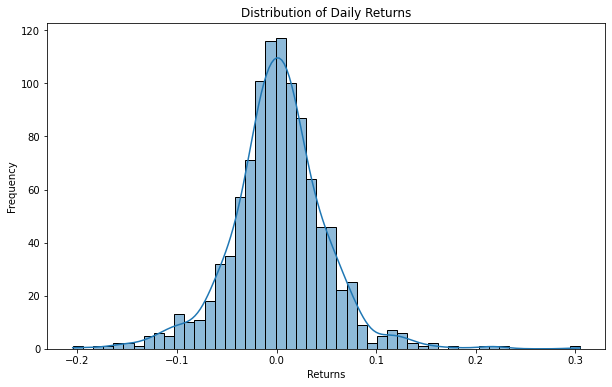

In [12]:
# Plot the distribution of returns
plt.figure(figsize=(10, 6))
sns.histplot(df['returns'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()


# Expected Returns and Standard Deviation

In [13]:
# Calculate mean and standard deviation of returns
mean_return = df['returns'].mean()
std_return = df['returns'].std()

print(f"Mean Return: {mean_return}")
print(f"Standard Deviation of Return: {std_return}")


Mean Return: 0.0018849854656829402
Standard Deviation of Return: 0.04849833078767601


# Monte Carlo Simulation for NEAR Future Price Paths

DATE
2024-07-08 00:00:00.000    4.473750
2024-07-07 00:00:00.000    4.679167
2024-07-06 00:00:00.000    4.573750
2024-07-05 00:00:00.000    4.363750
2024-07-04 00:00:00.000    4.892083
                             ...   
2021-09-14 00:00:00.000    8.656552
2021-09-13 00:00:00.000    8.334774
2021-09-12 00:00:00.000    9.009154
2021-09-11 00:00:00.000    9.214943
2021-09-10 00:00:00.000    9.430540
Name: PRICE, Length: 1033, dtype: float64
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.430540354]
[9.43054035

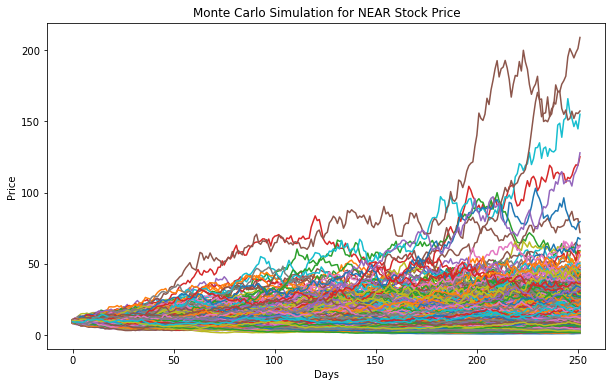

In [14]:
closing_prices = df.dropna()['PRICE']
print(closing_prices)

# Parameters
n_simulations = 1000
n_days = 252
#returns = closing_prices.pct_change().dropna()

# Calculate daily statistics
#mean_return = returns.mean()
#std_dev = returns.std()


# Monte Carlo simulation
simulations = np.zeros((n_days, n_simulations))

for i in range(n_simulations):
    daily_returns = np.random.normal(mean_return, std_return, n_days)
    price_series = [closing_prices.iloc[-1]]
    print(price_series)    
    for daily_return in daily_returns:
        price_series.append(price_series[-1] * (1 + daily_return))  
    simulations[:, i] = price_series[1:]

print(simulations)

# Plotting the simulation results
plt.figure(figsize=(10, 6))
plt.plot(simulations)
plt.title(f'Monte Carlo Simulation for NEAR Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()
